In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
# 1. Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#laod the test dataset MNIST Data:
PATH =  '/content/drive/MyDrive/NeuroTech/Preparation_Sun_Wednesday/FifthSession/'
test_dataset = pickle.load(open(PATH +"test_dataset.pkl","rb"))

In [9]:
test_loader = DataLoader(test_dataset, batch_size=64)

In [10]:
# load the scripted model
preTrained_model = torch.jit.load(PATH + "traced_model.pt")

In [11]:
preTrained_model

RecursiveScriptModule(
  original_name=SimpleNN
  (layers): RecursiveScriptModule(
    original_name=Sequential
    (0): RecursiveScriptModule(original_name=Flatten)
    (1): RecursiveScriptModule(original_name=Linear)
    (2): RecursiveScriptModule(original_name=ReLU)
    (3): RecursiveScriptModule(original_name=Linear)
    (4): RecursiveScriptModule(original_name=ReLU)
    (5): RecursiveScriptModule(original_name=Linear)
  )
  (output): RecursiveScriptModule(original_name=Softmax)
)

In [12]:
#test data to measure the performance of neural network
y_true = []
y_pred = []
with torch.no_grad():
    for features, target in test_loader:
      features, labels = features.to(device), target.to(device)
      logits, y_hat = preTrained_model(features)
      y_true.extend(target.cpu().numpy())#convert from pytorch to numpy
      y_pred.extend(y_hat.argmax(dim=1).cpu().numpy())

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from seaborn import heatmap

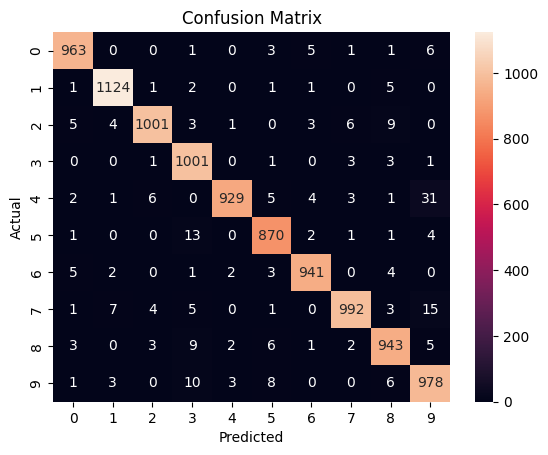

In [14]:
cm = confusion_matrix(y_true ,y_pred)
heatmap(cm, annot = True, fmt = 'd',
        xticklabels=list(range(10)),
        yticklabels = list(range(10)))
plt.xlabel("Predicted")
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

In [15]:
print("Acc: ", accuracy_score(y_true ,y_pred))
print("Classification report:\n ", classification_report(y_true ,y_pred))

Acc:  0.9742
Classification report:
                precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.96      0.99      0.97      1010
           4       0.99      0.95      0.97       982
           5       0.97      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.94      0.97      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



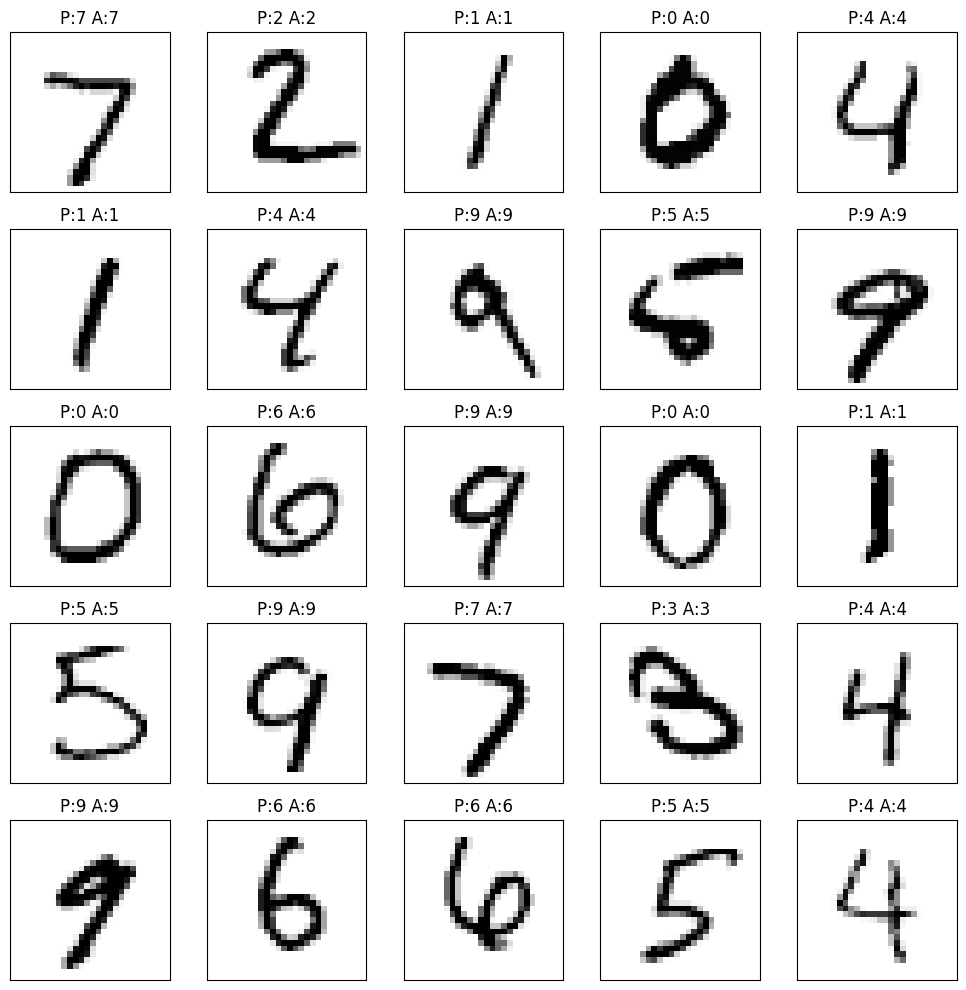

In [16]:
#viualization:
fig , ax = plt.subplots(nrows = 5, ncols = 5 , sharex = True, sharey = True, figsize = (10,10))
ax = ax.flatten()
for i in range(25):
  img = test_dataset[i][0][0]
  ax[i].imshow(img, cmap = 'Grays')
  ax[i].set_title(f"P:{y_pred[i]} A:{y_true[i]}")
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()



In [17]:
preTrained_model.state_dict()['layers.1.weight']

tensor([[-0.0038,  0.0275,  0.0222,  ...,  0.0073, -0.0337,  0.0019],
        [ 0.0422,  0.0138, -0.0066,  ..., -0.0051,  0.0517,  0.0081],
        [ 0.0300,  0.0367,  0.0339,  ...,  0.0554,  0.0284,  0.0627],
        ...,
        [ 0.0072,  0.0322,  0.0206,  ..., -0.0040,  0.0381, -0.0250],
        [ 0.0460,  0.0253, -0.0064,  ...,  0.0296, -0.0123,  0.0412],
        [ 0.0340,  0.0244, -0.0068,  ...,  0.0274, -0.0123,  0.0095]],
       device='cuda:0')

In [18]:
torch.load(PATH + 'model_weights.pth')['layers.1.weight']

tensor([[-0.0038,  0.0275,  0.0222,  ...,  0.0073, -0.0337,  0.0019],
        [ 0.0422,  0.0138, -0.0066,  ..., -0.0051,  0.0517,  0.0081],
        [ 0.0300,  0.0367,  0.0339,  ...,  0.0554,  0.0284,  0.0627],
        ...,
        [ 0.0072,  0.0322,  0.0206,  ..., -0.0040,  0.0381, -0.0250],
        [ 0.0460,  0.0253, -0.0064,  ...,  0.0296, -0.0123,  0.0412],
        [ 0.0340,  0.0244, -0.0068,  ...,  0.0274, -0.0123,  0.0095]],
       device='cuda:0')

In [19]:
torch.load(PATH + 'model_weights.pth')['layers.1.weight'] ==preTrained_model.state_dict()['layers.1.weight']

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]], device='cuda:0')

In [28]:
for name, param in preTrained_model.named_parameters():
    print(f"{name}  shape: {tuple(param.shape)}  requires_grad: {param.requires_grad}")

layers.1.weight  shape: (256, 784)  requires_grad: True
layers.1.bias  shape: (256,)  requires_grad: True
layers.3.weight  shape: (64, 256)  requires_grad: True
layers.3.bias  shape: (64,)  requires_grad: True
layers.5.weight  shape: (10, 64)  requires_grad: True
layers.5.bias  shape: (10,)  requires_grad: True


In [29]:
preTrained_model.state_dict()

OrderedDict([('layers.1.weight',
              tensor([[-0.0038,  0.0275,  0.0222,  ...,  0.0073, -0.0337,  0.0019],
                      [ 0.0422,  0.0138, -0.0066,  ..., -0.0051,  0.0517,  0.0081],
                      [ 0.0300,  0.0367,  0.0339,  ...,  0.0554,  0.0284,  0.0627],
                      ...,
                      [ 0.0072,  0.0322,  0.0206,  ..., -0.0040,  0.0381, -0.0250],
                      [ 0.0460,  0.0253, -0.0064,  ...,  0.0296, -0.0123,  0.0412],
                      [ 0.0340,  0.0244, -0.0068,  ...,  0.0274, -0.0123,  0.0095]],
                     device='cuda:0')),
             ('layers.1.bias',
              tensor([ 0.0238, -0.0463, -0.0604, -0.0488, -0.0039, -0.0483, -0.0238, -0.0029,
                       0.0504, -0.0283, -0.0130,  0.0228, -0.0447, -0.0594, -0.0033,  0.0269,
                      -0.0087, -0.0346,  0.0035, -0.0557, -0.0251, -0.0367, -0.0619, -0.0288,
                      -0.0010, -0.0028, -0.0341, -0.0303, -0.0353, -0.0604,  0.001